# 🌐🌏 Spatial Analysis of Airbnb and Housing Market  Dynamics in the UK 🏠💹

## Introduction
The focus here is a GIS task - to demonstrate the spatial relationship between the Airbnb data with other factors such as housing prices, and the short to let market. Using various datasets such as property selling price, demographics data, shortlet market data to answer series of questions using sspatial data sceince tools and technqies. For the study on the spatial relationship between Airbnb data, housing prices.

This codebook outlines the variables, data sources, and spatial data science methods that will be used in the analysis of Airbnb listings and their impact on housing prices and the short-let market in London city

## Hypothesis

**$H_0$**: There is relatiship between Airbnb listings price and house prices, and hsortlet market in London city

**$H_1$**: Airbnb listings  price ha no influence on airbnb listing and hosehe parice

### Overview of the Study
This study explores the intricate spatial dynamics between Airbnb listings, housing prices, and the short-let market in the UK. With the rapid growth of Airbnb, its influence on local housing markets has become a critical issue. This study employs advanced spatial data science techniques to analyze the distribution and impact of Airbnb listings across various regions in the UK. By integrating data on housing prices, short-let markets, and Airbnb activity, the research aims to uncover patterns and relationships that inform policy-making, urban planning, and real estate investment strategies.

### Research Questions


### Objectives
1. **Map the Spatial Distribution of Airbnb Listings:**
2. **Identify Clusters and Spatial Patterns:**
3. **Analyze the Impact of Proximity to Amenities:**
4. **Examine the Relationship Between Airbnb Listings and Housing Prices:**
5. **Visualize Socioeconomic Factors and Airbnb Density:**
6. **Assess the Impact of Airbnb on Local Housing Markets:**
7. **Evaluate Connectivity and Accessibility:**


These objectives will guide the study in systematically uncovering the spatial relationships between Airbnb activity, housing prices, and the short-let market, providing insights into the broader impact of short-term rentals on local housing dynamics in the UK.

## Variables

### Airbnb Data
- **listing_id**: Unique identifier for Airbnb listing.
- **latitude**: Latitude coordinate of listing/property/area.
- **longitude**: Longitude coordinate of listing/property/area.
- **price_per_night**: Price per night for Airbnb listing.
- **availability_365**: Number of days listing is available in a year.
- **number_of_reviews**: Total number of reviews for Airbnb listing.
- **neighbourhood**: Name of the neighborhood of Airbnb listing.

### Property Data
- **postcode**: Postal code of property/area (Source: Housing Prices, Short-let, ONS Data).
- **price**: Sale price of property (Source: UK House Price Index - UKHPI).
- **date_of_sale**: Date when the property was sold (Source: UK House Price Index - UKHPI).
- **property_type**: Type of property (detached, semi-detached, etc.) (Source: UK House Price Index - UKHPI).
- **rental_price**: Monthly rental price of short-let property (Source: Short-let Market Data).
- **availability_status**: Current availability status of short-let property (Source: Short-let Market Data).

### Socioeconomic Data
- **median_income**: Median household income for area (Source: ONS Data).
- **population_density**: Population density of area (Source: ONS Data).
- **unemployment_rate**: Unemployment rate for area (Source: ONS Data).

### Geographical Data
- **boundary_polygon**: Polygon representing geographical boundaries (Source: Ordnance Survey Data).

## Data Sources

- **Airbnb Data**: Data related to Airbnb listings, including pricing and reviews.
- **UK House Price Index (UKHPI)**: Provides information on property sales prices and property types.
- **Short-let Market Data**: Contains data on short-let rental prices and availability.
- **ONS Data**: Includes socioeconomic indicators such as median income, population density, and unemployment rate.
- **Ordnance Survey Data**: Provides geographical boundaries for the areas in question.


## Install all the required libraries

In [1]:
# data analysis
import pandas as pd
import scipy
import statsmodels
import polars as pl


# spatial anlaysis
import geopandas as gpd
import osmnx
import geopy
import pysal

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import folium


# set warning
import warnings

warnings.filterwarnings('ignore')

In [2]:
# set dataframe max display width
pd.set_option('display.max_columns',100)
pd.set_option('display.expand_frame_repr', False)

## Data Import and Pre-processing: 

Importing datasets (Airbnb, housing prices, short-let market data, etc.). Cleaning and pre-processing data, including geocoding.

In [3]:
# read all data 
airbnb_path = "data/Airbnb listings.csv"

# property sales data
property_price_path = "data/UK Property Price data 1995-2023-04/202304.csv"

# demographic data
demo_data =""

# scrapped shortlet market data
rightmove_path= "data_output/rightmove_2024-08-24.csv"
omt_path= "data_output/omt_2024-08-24.csv"

# lsaoa boundary data

boundary_path = "data/Lower_Layer_Super_Output_Area_(2021)_to_LAD_(April_2023)_Lookup_in_England_and_Wales.zip"



### Data Transformation


#### Airbnb

In [4]:
airbnb_listing = pd.read_csv(airbnb_path)
airbnb_listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,20240319050633,2024-03-21,city scrape,Spacious Central London Apartment by Hoxton Sq...,"Very central location, in the middle of Shored...",Everything is so convenient and the area is al...,https://a0.muscache.com/pictures/miso/Hosting-...,1608226,https://www.airbnb.com/users/show/1608226,Pippa,2012-01-15,"London, United Kingdom",I love exploring new places when possible and ...,within a few hours,100%,98%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Shoreditch,1.0,3.0,"['email', 'phone']",t,t,"London, England, United Kingdom",Hackney,NaN,51.52704,-0.08129,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180,2.0,9.0,180.0,180.0,7.6,180.0,NaN,t,7,17,30,81,2024-03-21,122,26,0,2012-07-12,2024-02-03,4.96,4.97,4.93,4.96,5.00,4.89,4.93,NaN,f,1,1,0,0,0.86
1,13913,https://www.airbnb.com/rooms/13913,20240319050633,2024-03-20,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,86%,84%,t,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,5.0,"['email', 'phone']",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56861,-0.11270,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,29,52,82,351,2024-03-20,41,1,0,2010-08-18,2023-11-26,4.80,4.73,4.73,4.75,4.83,4.70,4.70,NaN,f,3,2,1,0,0.25
2,15400,https://www.airbnb.com/rooms/15400,20240319050633,2024-03-20,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Royal Borough of Kensington and Chelsea, Unite...","English, grandmother, I have travelled quite ...",within a day,100%,40%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone']",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30,4.0,4.0,30.0,30.0,4.0,30.0,NaN,t,12,12,1

In [5]:
airbnb_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            90852 non-null  int64  
 1   listing_url                                   90852 non-null  object 
 2   scrape_id                                     90852 non-null  int64  
 3   last_scraped                                  90852 non-null  object 
 4   source                                        90852 non-null  object 
 5   name                                          90852 non-null  object 
 6   description                                   87851 non-null  object 
 7   neighborhood_overview                         47521 non-null  object 
 8   picture_url                                   90842 non-null  object 
 9   host_id                                       90852 non-null 

THe airbnb datasets has 75 columns we are going to be selectung fwew out of the 75 columns that matches the goal of this task

In [7]:
selected_columns = ['neighbourhood', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price','review_scores_rating',
       'review_scores_location']

airbnb_listing_df = airbnb_listing[selected_columns]
airbnb_listing_df.head().T

,0,1,2,3,4
neighbourhood,"London, England, United Kingdom","Islington, Greater London, United Kingdom","London, United Kingdom","Lambeth, England, United Kingdom","Kensington, England, United Kingdom"
neighbourhood_cleansed,Hackney,Islington,Kensington and Chelsea,Lambeth,Kensington and Chelsea
latitude,51.52704,51.56861,51.4878,51.46788,51.51735
longitude,-0.08129,-0.1127,-0.16813,-0.09993,-0.21076
property_type,Entire rental unit,Private room in rental unit,Entire rental unit,Private room in rental unit,Entire rental unit
room_type,Entire home/apt,Private room,Entire home/apt,Private room,Entire home/apt
accommodates,2,1,2,2,2
bathrooms,1.0,1.0,1.0,1.0,1.0
bedrooms,1.0,1.0,1.0,1.0,1.0
beds,1.0,1.0,1.0,1.0,1.0


In [8]:
airbnb_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood           47522 non-null  object 
 1   neighbourhood_cleansed  90852 non-null  object 
 2   latitude                90852 non-null  float64
 3   longitude               90852 non-null  float64
 4   property_type           90852 non-null  object 
 5   room_type               90852 non-null  object 
 6   accommodates            90852 non-null  int64  
 7   bathrooms               57894 non-null  float64
 8   bedrooms                78118 non-null  float64
 9   beds                    57837 non-null  float64
 10  amenities               90852 non-null  object 
 11  price                   57885 non-null  object 
 12  review_scores_rating    65869 non-null  float64
 13  review_scores_location  65808 non-null  float64
dtypes: float64(7), int64(1), object(6)
mem

Price is only fixed for 57885 out of  90852 entries, since price is the biggest attribute we are intrested in, we will be drropping other data wihtout pricee, because it will affect the reuskt sof this analysis  for us to analyse and understand a good relation with what is on ground if we include data without price.

In [9]:
airbnb_listing_df = airbnb_listing_df.dropna(subset='price')
len(airbnb_listing_df)

57885

In [10]:
airbnb_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57885 entries, 0 to 90851
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood           30104 non-null  object 
 1   neighbourhood_cleansed  57885 non-null  object 
 2   latitude                57885 non-null  float64
 3   longitude               57885 non-null  float64
 4   property_type           57885 non-null  object 
 5   room_type               57885 non-null  object 
 6   accommodates            57885 non-null  int64  
 7   bathrooms               57835 non-null  float64
 8   bedrooms                57820 non-null  float64
 9   beds                    57778 non-null  float64
 10  amenities               57885 non-null  object 
 11  price                   57885 non-null  object 
 12  review_scores_rating    43728 non-null  float64
 13  review_scores_location  43710 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory u

* The price column will be converted from a string to a numeric type while removing any dollar signs and ensuring it was represented as a float.
* Missing values across all columns iwll be fill with zeroes to avoid any NaN issues.
* Columns like bathrooms, bedrooms, and beds, originally stored as floats, will aalso be converted to integers for consistency.
* The amenities column, which contained lists of amenities as strings will be converted into binary columns for each unique amenity, where 1 indicated the presence of that amenity and 0 indicated its absence.

In [11]:
import ast

# Convert `price` to numeric after removing the dollar sign
airbnb_listing_df['price'] = airbnb_listing_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert appropriate columns to numeric
airbnb_listing_df['bathrooms'] = pd.to_numeric(airbnb_listing_df['bathrooms'], errors='coerce')
airbnb_listing_df['bedrooms'] = pd.to_numeric(airbnb_listing_df['bedrooms'], errors='coerce')
airbnb_listing_df['beds'] = pd.to_numeric(airbnb_listing_df['beds'], errors='coerce')
airbnb_listing_df['review_scores_rating'] = pd.to_numeric(airbnb_listing_df['review_scores_rating'], errors='coerce')
airbnb_listing_df['review_scores_location'] = pd.to_numeric(airbnb_listing_df['review_scores_location'], errors='coerce')

# Fill all NaN values with zeroes
airbnb_listing_df.fillna(0, inplace=True)

In [12]:
airbnb_listing_df.head()

,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,review_scores_rating,review_scores_location
0,"London, England, United Kingdom",Hackney,51.52704,-0.08129,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",160.0,4.96,4.89
1,"Islington, Greater London, United Kingdom",Islington,51.56861,-0.11270,Private room in rental unit,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",65.0,4.80,4.70
2,"London, United Kingdom",Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",120.0,4.80,4.93
3,"Lambeth, England, United Kingdom",Lambeth,51.46788,-0.09993,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Shampoo"", ""Dishwasher"", ""Fire extinguisher"",...",65.0,4.72,4.34
4,"Kensington, England, United Kingdom",Kensington and Chelsea,51.51735,-0.21076,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",100.0,4.74,4.87


Still in the data cleaning process, we saw that our hood coloumns still missing some data, since we have the logitude and lat , we we try to extract the names of those neighbour from the London neigbourhood boundary file, this is more enfienct that geocoding because uisng geocoing needs we need a geocoing servies that can takes upto 10,000 request freely which is not something easily available isnce all geodcoing tool has limit on how many request can be sent in a day

We tried to create another dataframe for the amenities, we want to explore the amenities based on indiviaual to see which amenities  actually afffected the price the most

In [13]:
# copy the main cleaned df
airbnb_amenities = pd.DataFrame()
airbnb_amenities= airbnb_listing_df[['amenities','price']]

# Convert `amenities` from string to a list
airbnb_amenities['amenities'] = airbnb_amenities['amenities'].apply(lambda x: ast.literal_eval(x))

# Collect all unique amenities
all_amenities = set()
for amenities_list in airbnb_amenities['amenities']:
    all_amenities.update(amenities_list)

# Create binary columns for each unique amenity
for amenity in all_amenities:
    airbnb_amenities[amenity] = airbnb_amenities['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Drop the original 'amenities' column as it's no longer needed
airbnb_amenities.drop('amenities', axis=1, inplace=True)

In [14]:
airbnb_amenities

,price,Sandstrom refrigerator,"TV with Amazon Prime Video, Chromecast, Netflix",Fast wifi – 135 Mbps,Paid parking lot on premises – 100 spaces,Big fridge freezer refrigerator,Denon sound system,Laser tag,"HDTV with Netflix, Apple TV, Fire TV, Amazon Prime Video, Chromecast, Disney+",Argos refrigerator,Variable conditioner,Building staff,Sonos - WiFi Connect Multi Room Audio sound system,"HDTV with Amazon Prime Video, Apple TV, Netflix, premium cable, DVD player, standard cable",Bluetooth bathroom mirrors Bluetooth sound system,CDA gas stove,Sound bar on connected to tv sound system,Bang & Olufsen Bluetooth sound system,Treseme conditioner,Best brands body soap,One shelf in a refrigerator is available for guest. refrigerator,"55"" HDTV with Amazon Prime Video, Apple TV, Disney+, Netflix, DVD player","65"" TV with Netflix, premium cable",Clothing storage: wardrobe,Cole and Lewis shampoo,"60"" HDTV with Amazon Prime Video, Netflix, premium cable, standard cable",Housekeeping available 2 days a week - available at extra cost,"85"" HDTV with Amazon Prime Video, Disney+, Netflix, premium cable","50"" HDTV with Amazon Prime Video, Disney+, premium cable, Netflix","43"" HDTV with Amazon Prime Video, Chromecast, Disney+, Netflix",ĢODIN (French professional cooker) gas stove,Hotel guest mini conditioner,"Lush, aesop, molton brown body soap",VAS body soap,2 in 1 shampoo conditioner shampoo,"47"" HDTV with Apple TV, standard cable",Full size 50:50 fridge and freezer refrigerator,Wifi – 8 Mbps,Smeg stainless steel oven,Smeg gas stove,"55"" HDTV with Amazon Prime Video, Disney+, Netflix",Heads and Shoulder shampoo,Bosch electric stove,"40"" TV with Amazon Prime Video, Roku",Fast wifi – 756 Mbps,LOEWE Bluetooth sound system,"92"" TV with Amazon Prime Video, Netflix",Un branded body soap,"65"" HDTV with Amazon Prime Video, Netflix, Fire TV",Delonghi single oven,...,"43"" HDTV with Amazon Prime Video, Netflix, standard cable",Pizza oven as well as a regular fan oven stainless steel oven,"Kenwood combined micrwave, grill and oven oven",Game console: PS3 and Xbox One,Simens oven,Shared electric oven in shared kitchen oven,Palmolive shampoo,Unknown stainless steel gas stove,L'Oreal shampoo,Taylors of London shampoo,Imperial lather body soap,Refrigerator refrigerator,"55"" HDTV with standard cable, Disney+, Netflix, Amazon Prime Video",Nan refrigerator,Shared indoor pool - available seasonally,"42"" HDTV with Chromecast, premium cable, standard cable","43"" HDTV with Amazon Prime Video, standard cable, Netflix",Alberto shampoo,"47"" HDTV with Disney+, Amazon Prime Video, Apple TV, Netflix, premium cable","42"" TV with Apple TV, Amazon Prime Video, Netflix",English high-street brand shampoo,Music systems in both kitchen/dining area and living room. Both with bluetooth sound system,"50"" HDTV with standard cable, Netflix, Amazon Prime Video, Apple TV, premium cable",Neom conditioner,Body wash body soap,"50"" HDTV with Amazon Prime Video, standard cable, Netflix, premium cable","42"" HDTV with Amazon Prime Video, Disney+, Fire TV, Netflix, premium cable, standard cable",J&J body soap,Golf course view,OGX Naturals conditioner,Bertazzoli oven,Lux shampoo,Lenco Bluetooth sound system,Rayburn oven,Anti bacterial body soap,"TV with Netflix, Chromecast","60"" TV with Apple TV, Netflix, premium cable",Hotpoint stainless steel induction stove,Faith In Nature conditioner,"HDTV with Apple TV, Amazon Prime Video, Netflix, Chromecast, Disney+, Fire TV",Apple HomePod Bluetooth sound system,"Housekeeping available from 4:00 PM to 6:00 PM, every day - available at extra cost",Simple body wash fragrance free body soap,Justforyou shampoo,Samsung gas stove,"TV with Amazon Prime Video, Disney+, Netflix, DVD player","49"" HDTV with Amazon Prime Video, Apple TV, Disney+, Fire TV, Netflix, premium cable","40"" HDTV with Roku, standard cable","55"" HDTV with Disney+, Fire TV, Amazon Prime Video, standard cable",Smug oven
0,160.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [15]:
airbnb_amenities.columns


Index(['price', 'Sandstrom refrigerator',
       'TV with Amazon Prime Video, Chromecast, Netflix',
       'Fast wifi – 135 Mbps', 'Paid parking lot on premises – 100 spaces',
       'Big fridge freezer refrigerator', 'Denon sound system', 'Laser tag',
       'HDTV with Netflix, Apple TV, Fire TV, Amazon Prime Video, Chromecast, Disney+',
       'Argos  refrigerator',
       ...
       'Apple HomePod Bluetooth sound system',
       'Housekeeping available from 4:00 PM to 6:00 PM, every day - available at extra cost',
       'Simple body wash fragrance free body soap', 'Justforyou shampoo',
       'Samsung gas stove',
       'TV with Amazon Prime Video, Disney+, Netflix, DVD player',
       '49" HDTV with Amazon Prime Video, Apple TV, Disney+, Fire TV, Netflix, premium cable',
       '40" HDTV with Roku, standard cable',
       '55" HDTV with Disney+, Fire TV, Amazon Prime Video, standard cable',
       'Smug oven'],
      dtype='object', length=9088)

In [16]:
# check the total unique attributes used
len(airbnb_amenities.columns)

9088

In [17]:
# Sum the values across all rows for each amenity (i.e., sum columns)
amenities_sum = airbnb_amenities.sum(axis=0)

# Create a new DataFrame with 'Amenity' and 'Total'
amenities_summary = pd.DataFrame({
    'Amenity': amenities_sum.index,
    'Total': amenities_sum.values
})

# Display the resulting DataFrame
print(amenities_summary)

                                                Amenity       Total
0                                                 price  10435273.0
1                                Sandstrom refrigerator         1.0
2       TV with Amazon Prime Video, Chromecast, Netflix         2.0
3                                  Fast wifi – 135 Mbps        13.0
4             Paid parking lot on premises – 100 spaces         7.0
...                                                 ...         ...
9083  TV with Amazon Prime Video, Disney+, Netflix, ...         1.0
9084  49" HDTV with Amazon Prime Video, Apple TV, Di...         1.0
9085                 40" HDTV with Roku, standard cable         1.0
9086  55" HDTV with Disney+, Fire TV, Amazon Prime V...         1.0
9087                                          Smug oven         1.0

[9088 rows x 2 columns]


WE have total of 

#### Housing Prices Data

THe housye prices data was donloaded from KAgglem the dataset contains data from UK House Price Index (UKHPI) from HM Land Registry, Office for National Statistics (ONS). via kaggle platform

Link to the datasets:

WE introduce the fuse of polar libray here because it took lamsot an hour to load the data uisng pandas, polars is a more enfient tool to pandas when wroking with big data, pandas took 55min yo load the data which has over 28million rows , this same amout of data took less than 30seconds to load uisng pandas

In [18]:
# write schema for the data and the datetype

schema = {'Transaction_unique_identifier':pl.String,
          'price':pl.Int64, 'Date_of_Transfer':pl.Datetime,
            'postcode':pl.String, 'Property_Type':pl.String, 'Old/New':pl.String,
            'Duration':pl.Int64, 'PAON':pl.String, 'SAON':pl.String,
            'Street':pl.String, 'Locality':pl.String, 'Town/City':pl.String,
            'District':pl.String, 'County':pl.String, 'PPDCategory_Type':pl.String,
            'Record_Status - monthly_file_only':pl.String
            }

property_price_path = "data/UK Property Price data 1995-2023-04/202304.csv"

property_price = pl.read_csv(property_price_path,ignore_errors=True,
                            truncate_ragged_lines=True,has_header=False,
                            schema_overrides=schema)
print(property_price)

shape: (28_276_228, 16)
┌────────────┬────────┬────────────┬──────────┬───┬────────────┬───────────┬───────────┬───────────┐
│ Transactio ┆ price  ┆ Date_of_Tr ┆ postcode ┆ … ┆ District   ┆ County    ┆ PPDCatego ┆ Record_St │
│ n_unique_i ┆ ---    ┆ ansfer     ┆ ---      ┆   ┆ ---        ┆ ---       ┆ ry_Type   ┆ atus -    │
│ dentifier  ┆ i64    ┆ ---        ┆ str      ┆   ┆ str        ┆ str       ┆ ---       ┆ monthly_f │
│ ---        ┆        ┆ datetime[μ ┆          ┆   ┆            ┆           ┆ str       ┆ ile_o…    │
│ str        ┆        ┆ s]         ┆          ┆   ┆            ┆           ┆           ┆ ---       │
│            ┆        ┆            ┆          ┆   ┆            ┆           ┆           ┆ str       │
╞════════════╪════════╪════════════╪══════════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ {F887F88E- ┆ 70000  ┆ 1995-07-07 ┆ MK15 9HP ┆ … ┆ MILTON     ┆ MILTON    ┆ A         ┆ A         │
│ 7D15-4415- ┆        ┆ 00:00:00   ┆          ┆   ┆ KEYNES     ┆ KE

Create a new column called 'year' from 'Date_of_Transfer' so that we can easily filter the data by year

In [19]:
# create a new column named 'year' to store this formatted date.
property_price = property_price.with_columns(
    pl.col('Date_of_Transfer').dt.year().alias('year')
)

# Display the first row of the updated DataFrame to inspect the changes
property_price[0]

Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year
str,i64,datetime[μs],str,str,str,i64,str,str,str,str,str,str,str,str,str,i32
"""{F887F88E-7D15-4415-804E-52EAC…",70000,1995-07-07 00:00:00,"""MK15 9HP""","""D""","""N""",null,"""31""","""""","""ALDRICH DRIVE""","""WILLEN""","""MILTON KEYNES""","""MILTON KEYNES""","""MILTON KEYNES""","""A""","""A""",1995


In [20]:
property_price.select(pl.col('Property_Type')).unique()

Property_Type
str
"""D"""
"""F"""
"""S"""
"""T"""
"""O"""


 Property types and their full meanings:
- D: Detached
- S: Semi-Detached
- T: Terraced
- F: Flats/Maisonettes
- O: Other

In [21]:
import polars as pl

# Create a mapping dictionary for the property types
property_type_mapping = {
    "D": "Detached",
    "S": "Semi-Detached",
    "T": "Terraced",
    "F": "Flats/Maisonettes",
    "O": "Other"
}

# Convert the dictionary to a Polars-friendly format
replacement_expr = pl.col("Property_Type").replace(property_type_mapping)

# Create a new column 'Property_Type_Full' by replacing the property types
property_price = property_price.with_columns(
    replacement_expr.alias("Property_Type_Full")
)

# Display the first row of the updated DataFrame to inspect the changes
print(property_price.head())


shape: (5, 18)
┌─────────────┬───────┬─────────────┬──────────┬───┬─────────────┬─────────────┬──────┬────────────┐
│ Transaction ┆ price ┆ Date_of_Tra ┆ postcode ┆ … ┆ PPDCategory ┆ Record_Stat ┆ year ┆ Property_T │
│ _unique_ide ┆ ---   ┆ nsfer       ┆ ---      ┆   ┆ _Type       ┆ us - monthl ┆ ---  ┆ ype_Full   │
│ ntifier     ┆ i64   ┆ ---         ┆ str      ┆   ┆ ---         ┆ y_file_o…   ┆ i32  ┆ ---        │
│ ---         ┆       ┆ datetime[μs ┆          ┆   ┆ str         ┆ ---         ┆      ┆ str        │
│ str         ┆       ┆ ]           ┆          ┆   ┆             ┆ str         ┆      ┆            │
╞═════════════╪═══════╪═════════════╪══════════╪═══╪═════════════╪═════════════╪══════╪════════════╡
│ {F887F88E-7 ┆ 70000 ┆ 1995-07-07  ┆ MK15 9HP ┆ … ┆ A           ┆ A           ┆ 1995 ┆ Detached   │
│ D15-4415-80 ┆       ┆ 00:00:00    ┆          ┆   ┆             ┆             ┆      ┆            │
│ 4E-52EAC…   ┆       ┆             ┆          ┆   ┆             ┆          

Extract the postcode district from the full postcode to enable aggregation of data at the postcode district level. This will allow us to analyze and summarize the data based on postcode districts.

In [22]:
# Create a new column 'year' by extracting the postcode part before the space
property_price = property_price.with_columns(
    pl.col('postcode').str.extract(r'^(\S+)', 1).alias('postcode_district')
)

# Display the first row of the updated DataFrame to inspect the changes
print(property_price[0])

shape: (1, 19)
┌─────────────┬───────┬─────────────┬──────────┬───┬─────────────┬──────┬─────────────┬────────────┐
│ Transaction ┆ price ┆ Date_of_Tra ┆ postcode ┆ … ┆ Record_Stat ┆ year ┆ Property_Ty ┆ postcode_d │
│ _unique_ide ┆ ---   ┆ nsfer       ┆ ---      ┆   ┆ us - monthl ┆ ---  ┆ pe_Full     ┆ istrict    │
│ ntifier     ┆ i64   ┆ ---         ┆ str      ┆   ┆ y_file_o…   ┆ i32  ┆ ---         ┆ ---        │
│ ---         ┆       ┆ datetime[μs ┆          ┆   ┆ ---         ┆      ┆ str         ┆ str        │
│ str         ┆       ┆ ]           ┆          ┆   ┆ str         ┆      ┆             ┆            │
╞═════════════╪═══════╪═════════════╪══════════╪═══╪═════════════╪══════╪═════════════╪════════════╡
│ {F887F88E-7 ┆ 70000 ┆ 1995-07-07  ┆ MK15 9HP ┆ … ┆ A           ┆ 1995 ┆ Detached    ┆ MK15       │
│ D15-4415-80 ┆       ┆ 00:00:00    ┆          ┆   ┆             ┆      ┆             ┆            │
│ 4E-52EAC…   ┆       ┆             ┆          ┆   ┆             ┆      ┆   

In [23]:
year_building_sold = property_price.select(pl.col("year")).unique()
print("Total year data was collected for:",len(year_building_sold), 'years')
print(year_building_sold.to_series().to_list())

Total year data was collected for: 29 years
[1995, 1998, 2004, 2001, 2019, 2007, 2016, 2010, 2022, 2013, 2005, 1999, 1996, 2008, 2011, 2002, 2020, 2014, 2017, 2023, 1997, 2009, 2012, 2015, 2018, 2003, 2006, 2000, 2021]


To analyze trends in London over the past decade using our dataset, we will focus on data from the years 2013 to 2023. The original dataset spans from 1995 to 2023, but for our analysis, we will filter out records to include only those from London and within the specified time range. This will allow us to examine trends specifically related to building sales in London during this period.

In [24]:
london_sold_property = property_price.filter(
    (pl.col("year") >= 2013) &
    (pl.col("Town/City") == "LONDON")
)

print(london_sold_property)

shape: (708_864, 19)
┌─────────────┬─────────┬─────────────┬──────────┬───┬────────────┬──────┬────────────┬────────────┐
│ Transaction ┆ price   ┆ Date_of_Tra ┆ postcode ┆ … ┆ Record_Sta ┆ year ┆ Property_T ┆ postcode_d │
│ _unique_ide ┆ ---     ┆ nsfer       ┆ ---      ┆   ┆ tus - mont ┆ ---  ┆ ype_Full   ┆ istrict    │
│ ntifier     ┆ i64     ┆ ---         ┆ str      ┆   ┆ hly_file_o ┆ i32  ┆ ---        ┆ ---        │
│ ---         ┆         ┆ datetime[μs ┆          ┆   ┆ …          ┆      ┆ str        ┆ str        │
│ str         ┆         ┆ ]           ┆          ┆   ┆ ---        ┆      ┆            ┆            │
│             ┆         ┆             ┆          ┆   ┆ str        ┆      ┆            ┆            │
╞═════════════╪═════════╪═════════════╪══════════╪═══╪════════════╪══════╪════════════╪════════════╡
│ {BADC1CBC-8 ┆ 620000  ┆ 2013-02-14  ┆ W9 1BE   ┆ … ┆ A          ┆ 2013 ┆ Flats/Mais ┆ W9         │
│ C1C-4AD8-AA ┆         ┆ 00:00:00    ┆          ┆   ┆            ┆   

#### Shortlet Market data downloaded

THe shortlet market data was doenaloded from rightmove, on the market and zoopla services the last 7 days sales and rent data set was scrappedm we could only scrapped for  longs 7days beacause this paltform has a limit to aht we could get from the platofrm, a selenum python scrapper was beault to scrapped and clean this data.

Sources:
* rightmove.co.uk
* onthemarket
* zoopla.co.uk

In [26]:
rightmove_data = pd.read_csv(rightmove_path)
omt_data = pd.read_csv(omt_path)

In [27]:
## meregd the two data
meregd_data = pd.concat([omt_data,rightmove_data])
meregd_data.head()

,transaction,address,bedroom,bathroom,sales_price,rent_perMonth,rent_perWeek,description,propertyType,location,agent,listing_source,listing_url,listed_date
0,rent,"Vanderbilt Road, London, SW18",5.0,3.0,NaN,4750.0,1096.0,5 bedroom terraced house to rent,Terraced,SW18,Savills - Wandsworth,omt,https://www.onthemarket.com/details/15383726/,Added > 14 days
1,rent,Joyners Close Dagenham,2.0,1.0,NaN,1900.0,438.0,2 bedroom terraced house to rent,Terraced,Dagenham,NaN,omt,https://www.onthemarket.com/details/15695892/,Added today
2,rent,"Tritton Road, London SE21",1.0,1.0,NaN,750.0,173.0,1 bedroom in a flat share to rent,Flat,SE21,NaN,omt,https://www.onthemarket.com/details/15695809/,Added today
3,rent,"Malden Road, New Malden KT3",1.0,1.0,NaN,750.0,173.0,1 bedroom in a house share to rent,House,KT3,NaN,omt,https://www.onthemarket.com/details/15695582/,Added today
4,rent,"Avon Road, Upminster RM14",2.0,1.0,NaN,1700.0,392.0,2 bedroom apartment to rent,Apartment,RM14,NaN,omt,https://www.onthemarket.com/details/15681803/,Added today


In [28]:
# fillna wiht 0
meregd_data = meregd_data.fillna(0)

# create columns for rent and listing
meregd_data['sales'] = meregd_data['transaction'].apply(lambda x: 1 if x=='sales' else 0)
meregd_data['rent'] = meregd_data['transaction'].apply(lambda x: 1 if x=='rent' else 0)

# dropunwanted columns
listing_df = meregd_data.drop(columns=['address','description','agent','listing_source','listing_url',
                                       'transaction','listed_date'], axis=1)
listing_df.head()

,bedroom,bathroom,sales_price,rent_perMonth,rent_perWeek,propertyType,location,sales,rent
0,5.0,3.0,0.0,4750.0,1096.0,Terraced,SW18,0,1
1,2.0,1.0,0.0,1900.0,438.0,Terraced,Dagenham,0,1
2,1.0,1.0,0.0,750.0,173.0,Flat,SE21,0,1
3,1.0,1.0,0.0,750.0,173.0,House,KT3,0,1
4,2.0,1.0,0.0,1700.0,392.0,Apartment,RM14,0,1


In [29]:
# check rent data infomation
rent_listing_df = listing_df[listing_df['rent']==1]
rent_listing_df['propertyType'].unique()

array(['Terraced', 'Flat', 'House', 'Apartment', 'Studio', 0, 'Penthouse',
       'Maisonette', 'Semi-detached', 'Detached', 'Duplex', 'House Share',
       'End of Terrace', 'Flat Share', 'Semi-Detached', 'Not Specified',
       'Ground Flat', 'Chalet', 'Block of Apartments', 'Town House',
       'Mews', 'Bungalow', 'Serviced Apartments'], dtype=object)

In [30]:
# check sales data infomation
sales_listing_df = listing_df[listing_df['sales']==1]
sales_listing_df['propertyType'].unique()

array(['House', 'Semi-detached', 'Studio', 0, 'Flat', 'Apartment',
       'Terraced', 'Maisonette', 'Detached', 'Penthouse', 'Duplex',
       'Not Specified', 'Semi-Detached', 'Plot for sale', 'Town House',
       'Mews', 'Villa', 'Land for sale', 'End of Terrace',
       'Equestrian Facility', 'Block of Apartments',
       'Link Detached House', 'Character Property'], dtype=object)

#### Demographic Datasets

- **median_income**: Median household income for area (Source: ONS Data).
- **population_density**: Population density of area (Source: ONS Data).
- **unemployment_rate**: Unemployment rate for area (Source: ONS Data).

#### Selecting the best Boundary level to visualize our data

LSOA (Lower Super Output Area)  Boundary of City of London

In [31]:
# Define the file path to the shapefile containing LSOA boundaries for London
data = "data\statistical-gis-boundaries-london\ESRI\LSOA_2004_London_Low_Resolution.shp"

# Read the shapefile into a GeoDataFrame
lsao_boundary = gpd.read_file(data)

# Display the first few rows of the GeoDataFrame to inspect the data
lsao_boundary.head()


,LSOA_CODE,LSOA_NAME,MSOA_CODE,MSOA_NAME,STWARDCODE,STWARDNAME,LA_CODE,LA_NAME,geometry
0,E01000001,City of London 001A,E02000001,City of London 001,00AAFA,Aldersgate,00AA,City of London,"POLYGON ((532050.879 181817.674, 532021.188 18..."
1,E01000002,City of London 001B,E02000001,City of London 001,00AAFQ,Cripplegate,00AA,City of London,"POLYGON ((532267.748 181643.784, 532254.565 18..."
2,E01000003,City of London 001C,E02000001,City of London 001,00AAFQ,Cripplegate,00AA,City of London,"POLYGON ((532071.310 182159.597, 532135.127 18..."
3,E01000004,City of London 001D,E02000001,City of London 001,00AAFT,Farringdon Without,00AA,City of London,"POLYGON ((531172.252 181124.643, 531133.747 18..."
4,E01000005,City of London 001E,E02000001,City of London 001,00AAFX,Portsoken,00AA,City of London,"POLYGON ((533378.878 181459.767, 533439.561 18..."


<Axes: >

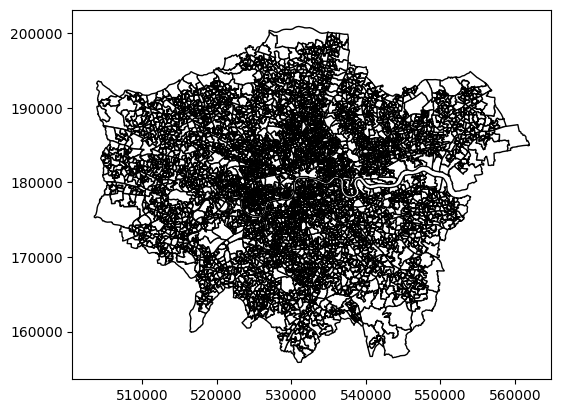

In [32]:
# Plot the LSOA boundaries 
lsao_boundary.plot(color='white', edgecolor='black')

Postal District Boundary Boundary of City of London

<Axes: >

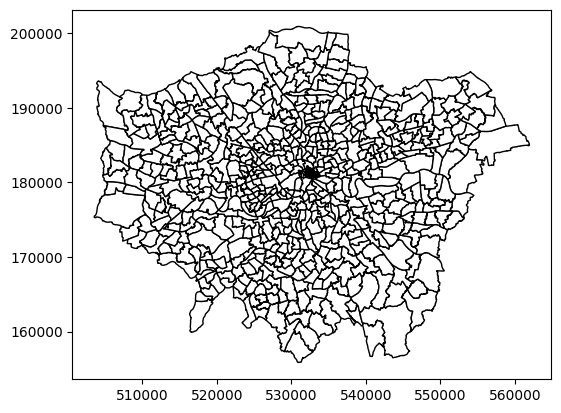

In [33]:
# Define the file path to the shapefile containing LSOA boundaries for London
ward = "data\statistical-gis-boundaries-london\ESRI\London_Ward.shp"

# Read the shapefile into a GeoDataFrame
ward_boundary = gpd.read_file(ward)

# viz data
ward_boundary.plot(color='white', edgecolor='black')


<Axes: >

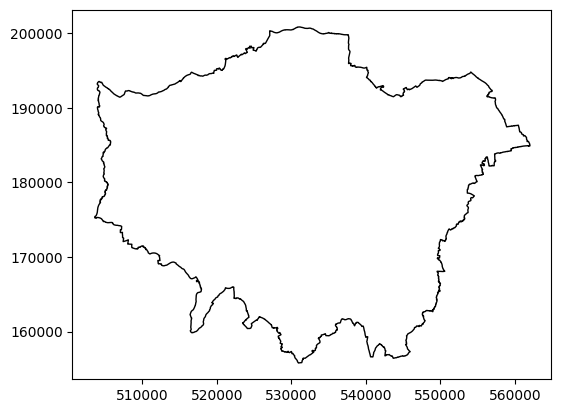

In [34]:
ward_boundary['dissolved_col'] = 1
ward_boundary_dissolved = ward_boundary.dissolve(by='dissolved_col')
ward_boundary_dissolved.plot(color='white', edgecolor='black')

<Axes: >

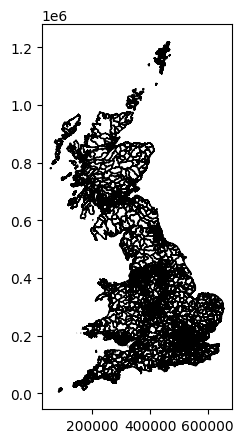

In [35]:
# Define the file path to the shapefile containing LSOA boundaries for London
data = "data/GB_Postcodes/PostalDistrict.shp"

# Read the shapefile into a GeoDataFrame
postaldistrict_boundary = gpd.read_file(data)

# Display the first few rows of the GeoDataFrame to inspect the data
postaldistrict_boundary.plot(color='white', edgecolor='black', figsize=(10,5))

LEts clip the whole UK postal district boundary to london alone

<Axes: >

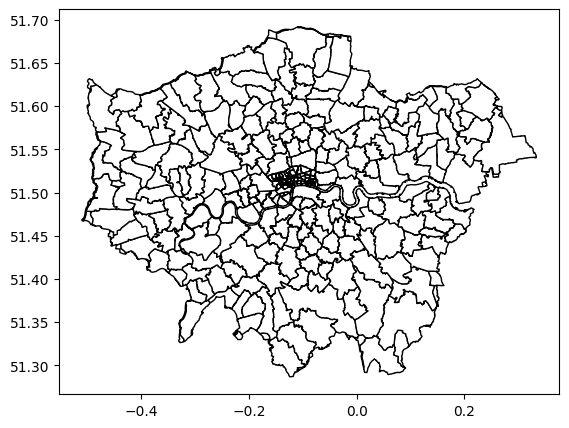

In [36]:
# convert the two data to the same cordinate reference system
ward_boundary_dissolved.to_crs(epsg=4326, inplace=True)
postaldistrict_boundary.to_crs(epsg=4326, inplace=True)

# clip the postal code boundary to oly london alone
london_postal_district = postaldistrict_boundary.clip(ward_boundary_dissolved)
london_postal_district.plot(color='white', edgecolor='black', figsize=(10,5))


In [37]:
london_postal_district.columns

Index(['DistID', 'PostDist', 'PostArea', 'DistNum', 'PCCnt', 'AnomCnt',
       'RefPC', 'x', 'y', 'Sprawl', 'Locale', 'geometry'],
      dtype='object')

In [38]:
london_postal_district.drop(columns=['DistNum','PCCnt', 'AnomCnt',
       'RefPC', 'x', 'y','Locale'],inplace=True)

london_postal_district.head()

,DistID,PostDist,PostArea,Sprawl,geometry
1156,1157,KT18,KT,Epsom,"POLYGON ((-0.30757 51.33647, -0.30686 51.34071..."
435,436,CR5,CR,London,"POLYGON ((-0.15965 51.31711, -0.15964 51.31716..."
1161,1162,KT22,KT,Leatherhead,"POLYGON ((-0.32823 51.35117, -0.32801 51.35127..."
2223,2224,SM7,SM,Banstead,"MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51..."
1155,1156,KT17,KT,Epsom,"MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51..."


#### Merged all Aggreagate Data to to the Postal Districts Boundary

SInce all the data we are working on are daa from the last two year or closer, we will be 

In [39]:
london_sold_property.head()

Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Property_Type_Full,postcode_district
str,i64,datetime[μs],str,str,str,i64,str,str,str,str,str,str,str,str,str,i32,str,str
"""{BADC1CBC-8C1C-4AD8-AAF4-AB0A6…",620000,2013-02-14 00:00:00,"""W9 1BE""","""F""","""N""",null,"""44G""","""""","""RANDOLPH AVENUE""","""""","""LONDON""","""CITY OF WESTMINSTER""","""GREATER LONDON""","""A""","""A""",2013,"""Flats/Maisonettes""","""W9"""
"""{2EDACF61-2CD7-4BB7-9863-AB0A6…",225000,2013-12-17 00:00:00,"""SW15 3HJ""","""F""","""N""",null,"""KERSFIELD HOUSE, 11""","""FLAT 2""","""KERSFIELD ROAD""","""PUTNEY""","""LONDON""","""WANDSWORTH""","""GREATER LONDON""","""A""","""A""",2013,"""Flats/Maisonettes""","""SW15"""
"""{224F0E05-9469-4179-872C-AE9F3…",200000,2013-08-20 00:00:00,"""NW10 5NL""","""F""","""N""",null,"""1108B""","""""","""HARROW ROAD""","""""","""LONDON""","""BRENT""","""GREATER LONDON""","""A""","""A""",2013,"""Flats/Maisonettes""","""NW10"""
"""{97AB81E1-3562-4241-BE63-A788B…",560000,2013-12-20 00:00:00,"""NW4 2JY""","""S""","""N""",null,"""26""","""""","""SOUTHBOURNE CRESCENT""","""""","""LONDON""","""BARNET""","""GREATER LONDON""","""A""","""A""",2013,"""Semi-Detached""","""NW4"""
"""{99956AA8-3A7F-4C69-B22B-B5B2F…",440000,2013-07-19 00:00:00,"""SW2 2DJ""","""T""","""N""",null,"""23""","""""","""CLAVERDALE ROAD""","""""","""LONDON""","""LAMBETH""","""GREATER LONDON""","""A""","""A""",2013,"""Terraced""","""SW2"""


In [ ]:
# rename the PostDist to be the same as the postcode district becaus thatwhat the data will be joined on
london_postal_district.rename(columns={'PostDist':'postcode_district'},
                              inplace=True)

london_postal_district.head()

In [40]:
property_price.select(pl.col("postcode_district")).unique()

postcode_district
str
"""CF43"""
"""DN22"""
"""SA13"""
"""EX9"""
"""SP6"""
…
"""BD1"""
"""TR2"""
"""PO11"""


SElect Price 

In [42]:
# Create SQL context with our DataFrame
ctx = pl.SQLContext(property=property_price, eager=True)

# Execute the SQL query to get the the median prices of property types across various locations
query_1 = ctx.execute("SELECT MEDIAN(price) AS median_price, postcode_district FROM property GROUP BY postcode_district")

# Convert the result to a Pandas DataFrame
median_price = query_1.to_pandas()


   median_price postcode_district
0      173000.0               IP5
1      184000.0               TW4
2      161500.0              NR15
3      250000.0              GU29
4      145000.0               NE3


In [104]:
# Execute SQL query and load the data into a Pandas DataFrame
query_1 = ctx.execute("""
    SELECT postcode_district,
           Property_Type_Full,
           price
    FROM property
""")

# Convert the result to a Pandas DataFrame
df = query_1.to_pandas()

# Calculate median price for each property type
median_prices = (df
    .groupby(["postcode_district", "Property_Type_Full"])["price"]
    .median()
    .reset_index()
    .rename(columns={"price": "median_price"})
)

# Pivot the DataFrame
pivot_df = median_prices.pivot(
    index="postcode_district",
    columns="Property_Type_Full",
    values="median_price"
)

# Fill missing values with 0 if needed
price_property_type = pivot_df.fillna(0).reset_index()


# price_property_type = price_property_type.drop(columns= ["Property_Type_Full"],axis=1)

# Show the result
price_property_type.head()


Property_Type_Full,postcode_district,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
0,AL1,582500.0,208000.0,558750.0,322900.0,270000.0
1,AL10,338000.0,151000.0,490000.0,223000.0,185000.0
2,AL2,415000.0,151000.0,462500.0,282500.0,235000.0
3,AL3,478250.0,184000.0,552500.0,310000.0,279950.0
4,AL4,420000.0,153000.0,566490.0,320000.0,220000.0


In [109]:
airbnb_listing_df.head()

,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,review_scores_rating,review_scores_location
0,"London, England, United Kingdom",Hackney,51.52704,-0.08129,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",160.0,4.96,4.89
1,"Islington, Greater London, United Kingdom",Islington,51.56861,-0.11270,Private room in rental unit,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",65.0,4.80,4.70
2,"London, United Kingdom",Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",120.0,4.80,4.93
3,"Lambeth, England, United Kingdom",Lambeth,51.46788,-0.09993,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Shampoo"", ""Dishwasher"", ""Fire extinguisher"",...",65.0,4.72,4.34
4,"Kensington, England, United Kingdom",Kensington and Chelsea,51.51735,-0.21076,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",100.0,4.74,4.87


In [118]:
# Create a GeoDataFrame from the DataFrame
airbnb_listing_gdf = gpd.GeoDataFrame(
    airbnb_listing_df, 
    geometry=gpd.points_from_xy(airbnb_listing_df.longitude, airbnb_listing_df.latitude),
    crs="EPSG:4326"
)
airbnb_listing_gdf.head()

,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,review_scores_rating,review_scores_location,geometry
0,"London, England, United Kingdom",Hackney,51.52704,-0.08129,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",160.0,4.96,4.89,POINT (-0.08129 51.52704)
1,"Islington, Greater London, United Kingdom",Islington,51.56861,-0.11270,Private room in rental unit,Private room,1,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",65.0,4.80,4.70,POINT (-0.11270 51.56861)
2,"London, United Kingdom",Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",120.0,4.80,4.93,POINT (-0.16813 51.48780)
3,"Lambeth, England, United Kingdom",Lambeth,51.46788,-0.09993,Private room in rental unit,Private room,2,1.0,1.0,1.0,"[""Shampoo"", ""Dishwasher"", ""Fire extinguisher"",...",65.0,4.72,4.34,POINT (-0.09993 51.46788)
4,"Kensington, England, United Kingdom",Kensington and Chelsea,51.51735,-0.21076,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",100.0,4.74,4.87,POINT (-0.21076 51.51735)


In [126]:
# do spatial join to join name from the postal dist
london_postal_district['geometry','postal']
gpd.sjoin(airbnb_listing_gdf, london_postal_district,how='left')

,DistID,postcode_district,PostArea,Sprawl,geometry,median_price_x,median_price_y,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
0,1157,KT18,KT,Epsom,"POLYGON ((-0.30757 51.33647, -0.30686 51.34071...",285000.0,285000.0,450000.0,192500.0,657500.0,300000.0,263000.0
1,436,CR5,CR,London,"POLYGON ((-0.15965 51.31711, -0.15964 51.31716...",287000.0,287000.0,452000.0,175000.0,350000.0,288000.0,233875.0
2,1162,KT22,KT,Leatherhead,"POLYGON ((-0.32823 51.35117, -0.32801 51.35127...",299950.0,299950.0,600000.0,199000.0,530000.0,275000.0,230000.0
3,2224,SM7,SM,Banstead,"MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51...",305000.0,305000.0,470000.0,215000.0,394000.0,300000.0,249950.0
4,1156,KT17,KT,Epsom,"MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51...",278475.0,278475.0,490000.0,195000.0,390000.0,328750.0,236000.0


<Axes: >

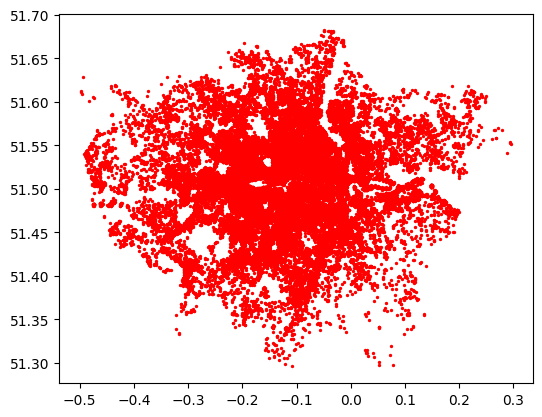

In [119]:
# Plot the GeoDataFrame
airbnb_listing_gdf.plot(markersize=2, color='red')
# airbnb_listing_gdf.sjoin(london_postal_district)

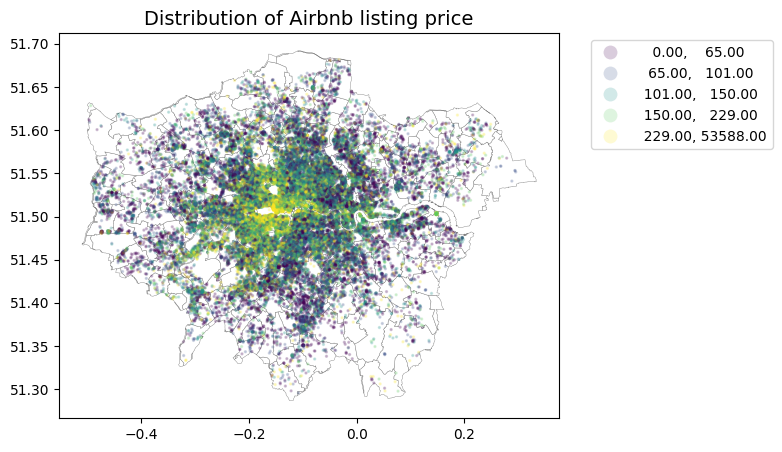

In [125]:
# Plot the GeoDataFrame
ax = london_postal_district.plot(color='white', edgecolor='grey',linewidth=0.3,figsize=(10,5))

airbnb_listing_gdf.plot(
    column='price',
    scheme='quantiles',     
    cmap='viridis',        
    legend=True,         
    markersize=2, 
    alpha=0.2,
    ax=ax
)

# Set the title and adjust its position
ax.set_title("Distribution of Airbnb listing price", fontsize=14)

# Adjust the legend to be outside the map
ax.get_legend().set_bbox_to_anchor((1.05, 1))  # Position the legend outside of the map
ax.get_legend().set_loc('upper left')  # Align the legend to the center-left

# Adjust subplot parameters to give more space to the plot
plt.subplots_adjust(right=0.75)  # Increase right margin

# Optional: show the plot with plt.show()
plt.show()

In [105]:
london_postal_district = london_postal_district.merge(median_price, how='left', 
                                                      on='postcode_district')

london_postal_district = london_postal_district.merge(price_property_type, how='left', 
                                                      on='postcode_district')

london_postal_district.head()

,DistID,postcode_district,PostArea,Sprawl,geometry,median_price_x,median_price_y,Detached,Flats/Maisonettes,Other,Semi-Detached,Terraced
0,1157,KT18,KT,Epsom,"POLYGON ((-0.30757 51.33647, -0.30686 51.34071...",285000.0,285000.0,450000.0,192500.0,657500.0,300000.0,263000.0
1,436,CR5,CR,London,"POLYGON ((-0.15965 51.31711, -0.15964 51.31716...",287000.0,287000.0,452000.0,175000.0,350000.0,288000.0,233875.0
2,1162,KT22,KT,Leatherhead,"POLYGON ((-0.32823 51.35117, -0.32801 51.35127...",299950.0,299950.0,600000.0,199000.0,530000.0,275000.0,230000.0
3,2224,SM7,SM,Banstead,"MULTIPOLYGON (((-0.22453 51.33585, -0.22217 51...",305000.0,305000.0,470000.0,215000.0,394000.0,300000.0,249950.0
4,1156,KT17,KT,Epsom,"MULTIPOLYGON (((-0.24131 51.36706, -0.23872 51...",278475.0,278475.0,490000.0,195000.0,390000.0,328750.0,236000.0


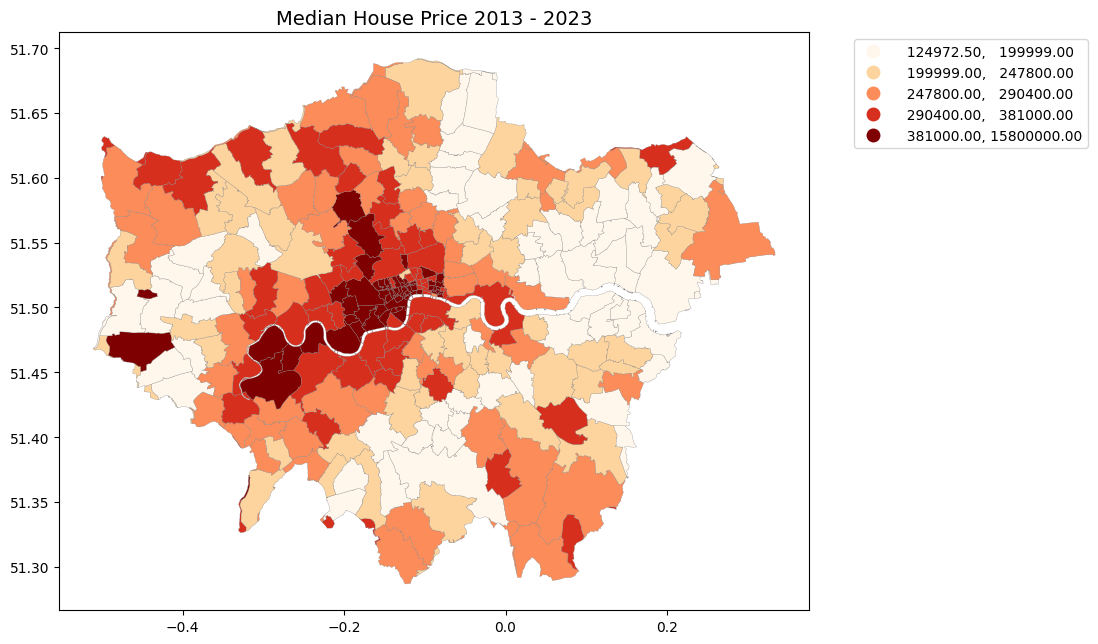

In [72]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))  # Adjusted figure size for better fit

# Plot the GeoDataFrame
london_postal_district.plot(column='median_price',
                            ax=ax,
                            cmap='OrRd',
                            scheme='quantiles',
                            k=5,
                            edgecolor='grey',
                            linewidth=0.2,
                            legend=True)

# Set the title and adjust its position
ax.set_title("Median House Price 2013 - 2023", fontsize=14)

# Adjust the legend to be outside the map
ax.get_legend().set_bbox_to_anchor((1.05, 1))  # Position the legend outside of the map
ax.get_legend().set_loc('upper left')  # Align the legend to the center-left

# Adjust subplot parameters to give more space to the plot
plt.subplots_adjust(right=0.75)  # Increase right margin

# Display the plot
plt.show()


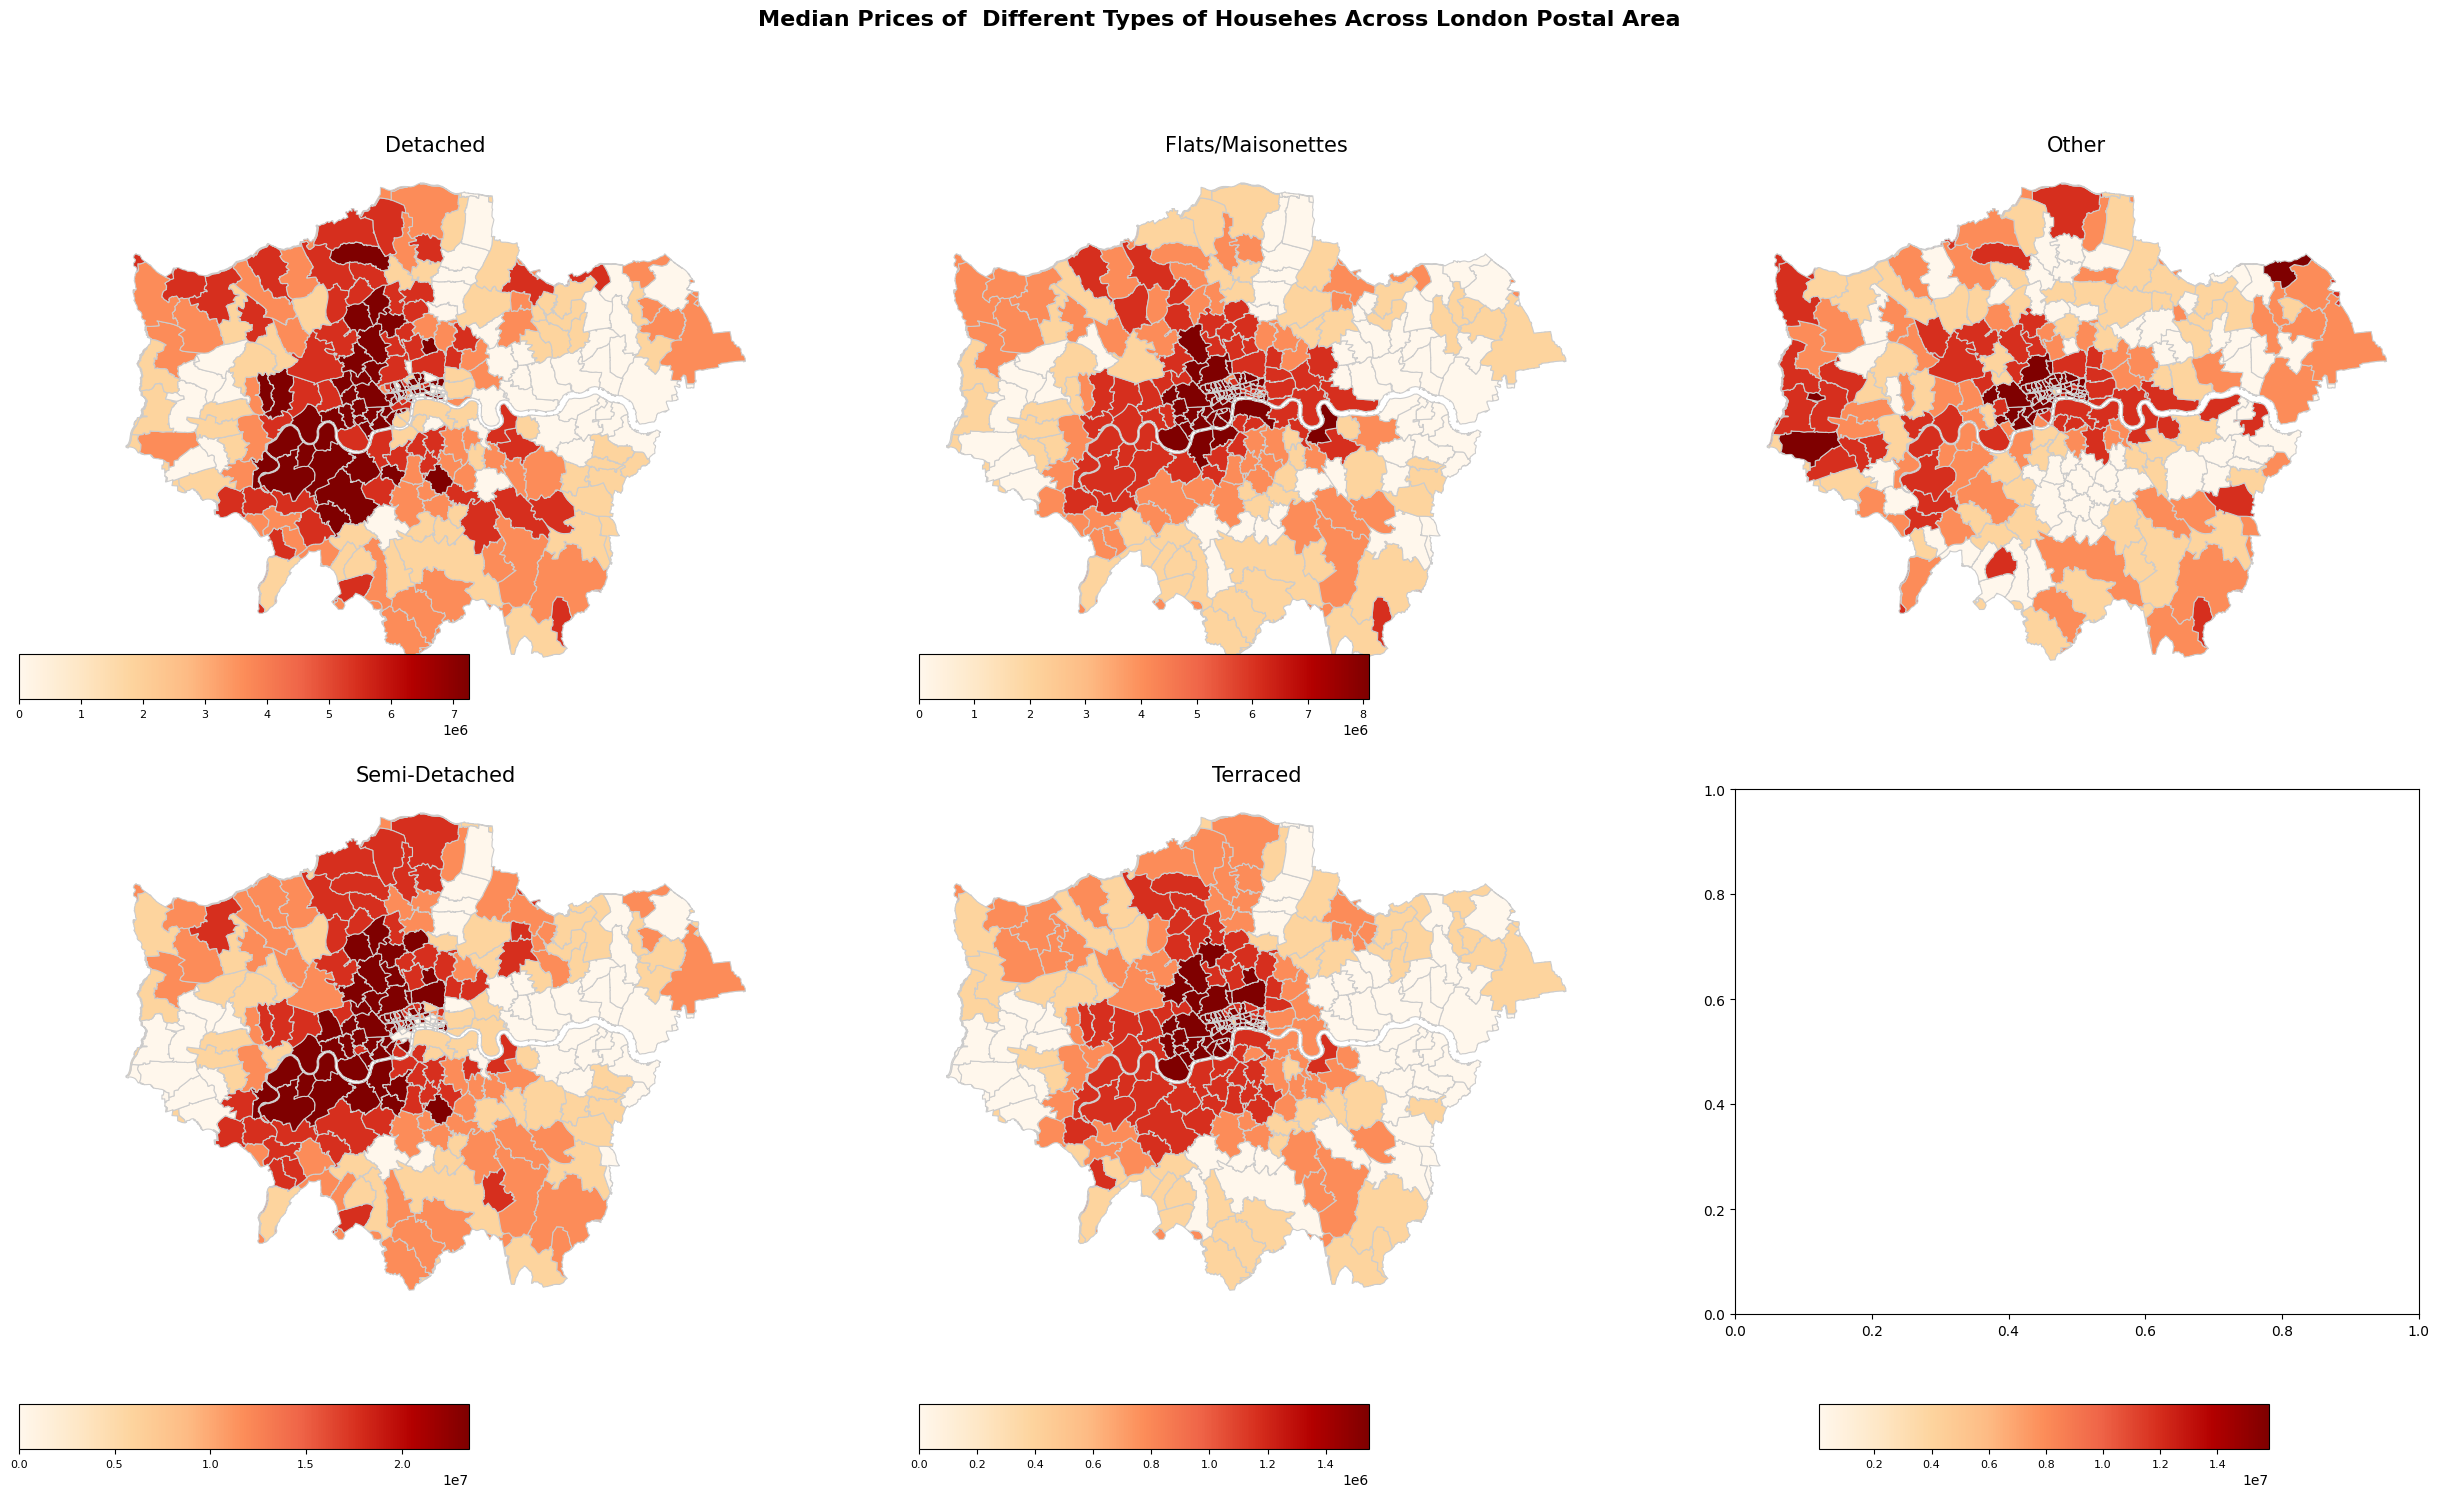

In [108]:
# Create choropleth map showing the median sales of different type of hosues across London Postal Area
# Create the figure and the axes
fig, axs = plt.subplots(2, 3, figsize=(30, 15))

# Loop through each year and create a choropleth map in each subplot
for i, columns in enumerate(['Detached','Flats/Maisonettes',
                             'Other','Semi-Detached','Terraced']):
    # Calculate the subplot coordinates
    row = i // 3
    col = i % 3

    # Create the choropleth map in the subplot
    london_postal_district.plot(column=columns, cmap='OrRd',scheme='quantiles',linewidth=0.8, ax=axs[row, col], edgecolor='0.8')
    axs[row, col].axis('off')
    axs[row, col].set_title(columns, fontdict={'fontsize': '15', 'fontweight': '6'})
    
    
     # Add a legend to the subplot
    cax = fig.add_axes([0.1 + col * 0.3, 0.02 + row * 0.50, 0.15, 0.03])
    sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=london_postal_district[columns].min(), vmax=london_postal_district[columns].max()))
    sm._A = []
    cbar = fig.colorbar(sm, cax=cax, orientation='horizontal')
    cbar.ax.tick_params(labelsize=8)

# Add a title to the entire figure
fig.suptitle('Median Prices of  Different Types of Househes Across London Postal Area', fontsize=16, fontweight='bold')



# Show the figure
plt.show()

## Spatial Exploratory Data Analysis (SEDA)


Descriptive statistics and initial visualizations of key variables.

Explore the data



### Airbnb Data

**Spatial Distribution:**
- How does the spatial distribution of listings with high review scores compare to those with lower scores?
- Are there specific areas where higher-priced properties tend to cluster?
- How does the average price of listings vary by neighborhood or neighborhood group?
- Are there significant differences in average review scores between different neighborhoods or neighborhood groups?

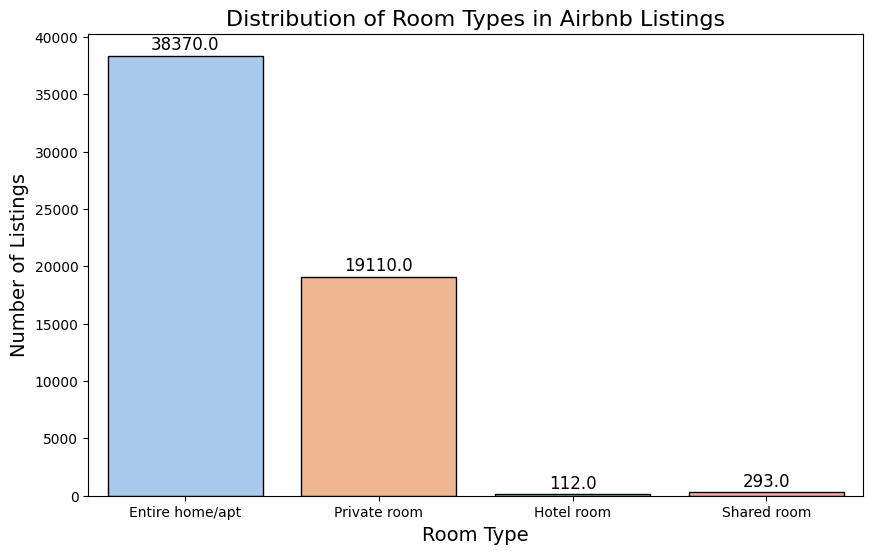

In [ ]:
# Set up the figure size for better readability
plt.figure(figsize=(10, 6))

# Create a count plot for room types
ax = sns.countplot(data=airbnb_listing_df, x='room_type', palette='pastel', edgecolor='black')

# Add labels and a title
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.title('Distribution of Room Types in Airbnb Listings', fontsize=16)

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=12)

# Display the plot
plt.show()


In [ ]:
# Calculate the percentage distribution of each room type
room_type_distribution = airbnb_listing_df['room_type'].value_counts(normalize=True) * 100

# Print the percentage distribution
print(room_type_distribution)

room_type
Entire home/apt    66.286603
Private room       33.013734
Shared room         0.506176
Hotel room          0.193487
Name: proportion, dtype: float64


The Airbnb data shows that the majority of listings are for "Entire home/apt" 63% (57,261), followed by "Private room" 36.2% (32,951). "Shared room" and "Hotel room" make up a small fraction of the listings, with 0.5% (459)  and 0.2% (181) entries, respectively.

In [ ]:
# selected_columns = ['neighbourhood', 'neighbourhood_cleansed', 'latitude',
#        'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
#        'bedrooms', 'beds', 'amenities', 'price','review_scores_rating',
#        'review_scores_location']

airbnb_listing_df['neighbourhood'].value_counts()

neighbourhood
0                                                27781
Greater London, England, United Kingdom          23778
London, United Kingdom                            2157
London, England, United Kingdom                   2136
London, Greater London, United Kingdom             277
                                                 ...  
London, Wembley, United Kingdom                      1
London, Dollis Hill/Willesden, United Kingdom        1
London, Greenwich, United Kingdom                    1
Bermondsey, United Kingdom                           1
Plaistow, London, England, United Kingdom            1
Name: count, Length: 647, dtype: int64

CHeck the destribution of the property types in the area

<Axes: xlabel='property_type'>

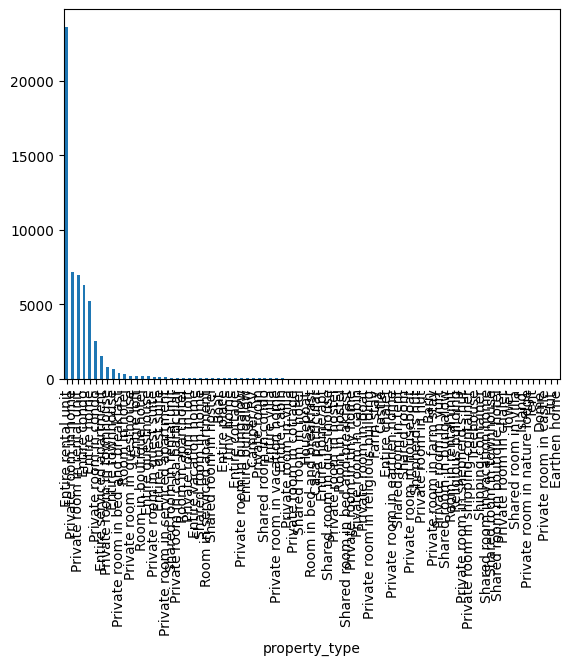

In [ ]:
airbnb_listing_df['property_type'].value_counts().plot(kind="bar")

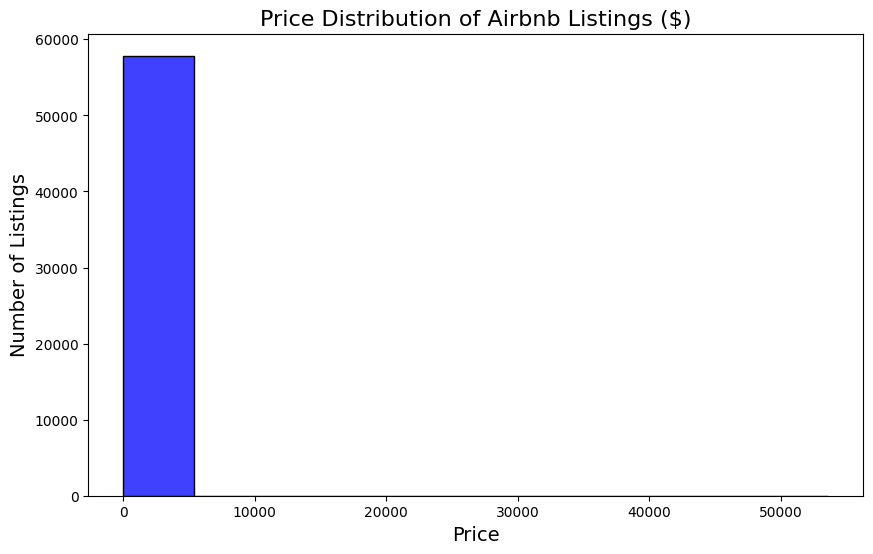

In [ ]:
## check the price distubiton usning histogram
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a histogram for the price distribution
sns.histplot(airbnb_listing_df['price'], bins=10, color='blue')

# Add labels and a title
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of Listings', fontsize=14)
plt.title('Price Distribution of Airbnb Listings ($)', fontsize=16)

# Show the plot
plt.show()

In [ ]:
airbnb_listing_df['price'].value_counts()

price
150.0     1155
100.0     1102
120.0     1024
60.0       998
50.0       975
          ... 
3845.0       1
3790.0       1
3545.0       1
1257.0       1
1760.0       1
Name: count, Length: 1125, dtype: int64

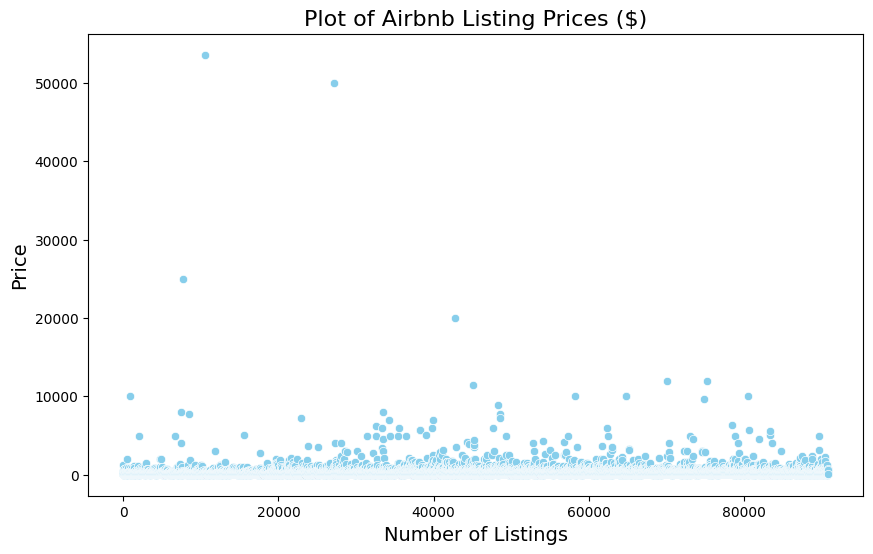

In [ ]:
# Set up the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot for the price
sns.scatterplot(data=airbnb_listing_df, x=airbnb_listing_df.index, y='price', color='skyblue')

# Add labels and a title
plt.xlabel('Number of Listings', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Plot of Airbnb Listing Prices ($)', fontsize=16)

# Show the plot
plt.show()

Capacity and Pricing Analysis
   - How does the price of listings correlate with the number of accommodations (e.g., accommodates 2 vs. 6)?
   - What is the relationship between the number of bedrooms or beds and the price of listings?

              price  bedrooms      beds  bathrooms
price      1.000000  0.216585  0.182749   0.193977
bedrooms   0.216585  1.000000  0.713018   0.604922
beds       0.182749  0.713018  1.000000   0.460393
bathrooms  0.193977  0.604922  0.460393   1.000000


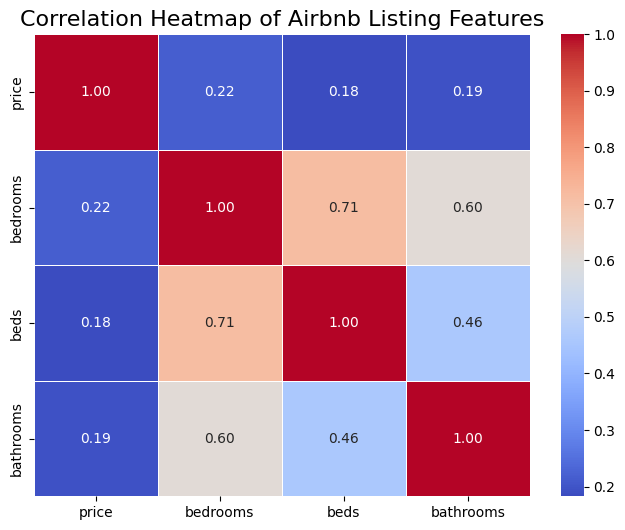

In [ ]:
# Select relevant columns for correlation analysis
selected_features = airbnb_listing_df[['price', 'bedrooms', 'beds', 'bathrooms']]

# Calculate the correlation matrix
correlation_matrix = selected_features.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations, a color map, and a title
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='white')

# Add a title to the heatmap
plt.title('Correlation Heatmap of Airbnb Listing Features', fontsize=16)

# Display the heatmap
plt.show()

#### Sold House in London

In [ ]:
property_price.head()

Transaction_unique_identifier,price,Date_of_Transfer,postcode,Property_Type,Old/New,Duration,PAON,SAON,Street,Locality,Town/City,District,County,PPDCategory_Type,Record_Status - monthly_file_only,year,Property_Type_Full,postcode_district
str,i64,datetime[μs],str,str,str,i64,str,str,str,str,str,str,str,str,str,i32,str,str
"""{F887F88E-7D15-4415-804E-52EAC…",70000,1995-07-07 00:00:00,"""MK15 9HP""","""D""","""N""",null,"""31""","""""","""ALDRICH DRIVE""","""WILLEN""","""MILTON KEYNES""","""MILTON KEYNES""","""MILTON KEYNES""","""A""","""A""",1995,"""Detached""","""MK15"""
"""{40FD4DF2-5362-407C-92BC-566E2…",44500,1995-02-03 00:00:00,"""SR6 0AQ""","""T""","""N""",null,"""50""","""""","""HOWICK PARK""","""SUNDERLAND""","""SUNDERLAND""","""SUNDERLAND""","""TYNE AND WEAR""","""A""","""A""",1995,"""Terraced""","""SR6"""
"""{7A99F89E-7D81-4E45-ABD5-566E4…",56500,1995-01-13 00:00:00,"""CO6 1SQ""","""T""","""N""",null,"""19""","""""","""BRICK KILN CLOSE""","""COGGESHALL""","""COLCHESTER""","""BRAINTREE""","""ESSEX""","""A""","""A""",1995,"""Terraced""","""CO6"""
"""{28225260-E61C-4E57-8B56-566E5…",58000,1995-07-28 00:00:00,"""B90 4TG""","""T""","""N""",null,"""37""","""""","""RAINSBROOK DRIVE""","""SHIRLEY""","""SOLIHULL""","""SOLIHULL""","""WEST MIDLANDS""","""A""","""A""",1995,"""Terraced""","""B90"""
"""{444D34D7-9BA6-43A7-B695-4F489…",51000,1995-06-28 00:00:00,"""DY5 1SA""","""S""","""N""",null,"""59""","""""","""MERRY HILL""","""BRIERLEY HILL""","""BRIERLEY HILL""","""DUDLEY""","""WEST MIDLANDS""","""A""","""A""",1995,"""Semi-Detached""","""DY5"""


Total year data was collected for: 29 years
[2001, 1998, 1995, 2004, 2013, 2007, 2022, 2019, 2010, 2016, 1996, 2005, 2002, 2008, 2011, 1999, 2017, 2014, 2020, 2023, 1997, 2015, 2009, 2018, 2012, 2003, 2006, 2000, 2021]


shape: (708_864, 19)
┌─────────────┬─────────┬─────────────┬──────────┬───┬────────────┬──────┬────────────┬────────────┐
│ Transaction ┆ price   ┆ Date_of_Tra ┆ postcode ┆ … ┆ Record_Sta ┆ year ┆ Property_T ┆ postcode_d │
│ _unique_ide ┆ ---     ┆ nsfer       ┆ ---      ┆   ┆ tus - mont ┆ ---  ┆ ype_Full   ┆ istrict    │
│ ntifier     ┆ i64     ┆ ---         ┆ str      ┆   ┆ hly_file_o ┆ i32  ┆ ---        ┆ ---        │
│ ---         ┆         ┆ datetime[μs ┆          ┆   ┆ …          ┆      ┆ str        ┆ str        │
│ str         ┆         ┆ ]           ┆          ┆   ┆ ---        ┆      ┆            ┆            │
│             ┆         ┆             ┆          ┆   ┆ str        ┆      ┆            ┆            │
╞═════════════╪═════════╪═════════════╪══════════╪═══╪════════════╪══════╪════════════╪════════════╡
│ {BADC1CBC-8 ┆ 620000  ┆ 2013-02-14  ┆ W9 1BE   ┆ … ┆ A          ┆ 2013 ┆ Flats/Mais ┆ W9         │
│ C1C-4AD8-AA ┆         ┆ 00:00:00    ┆          ┆   ┆            ┆   

postcode_district
str
"""B79"""
"""WR15"""
"""EC4A"""
"""EN9"""
"""TN30"""
…
"""KT16"""
"""YO51"""
"""IP21"""


In [ ]:
len()

A total of 708,864 properties were sold in London from 2012 up to April 2023, which is the most recent update of the data.

Short let market


In [ ]:
# Calculate the correlation matrix
corr_listing_df = rent_listing_df.drop(columns=['propertyType','location','rent','sales','sales_price'],axis=1).dropna()
correlation_matrix = corr_listing_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap with annotations, a color map, and a title
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='white')

# Add a title to the heatmap
plt.title('Correlation Heatmap of Airbnb Listing Features', fontsize=16)

# Display the heatmap
plt.show()

Amenities and Pricing
   - Which amenities are most commonly found in higher-priced listings?
   - How does the number of amenities offered impact the review scores or pricing?
   - Bathroom and Bedroom Analysis

Using the average (mean) can sometimes be misleading, especially if your data is skewed or contains outliers. In such cases, other statistical measures and visualizations can provide a more accurate and comprehensive understanding of the data distribution.

Median is the middle value of your dataset and is less affected by extreme values compared to the mean. It provides a better central tendency measure when the data is skewed.

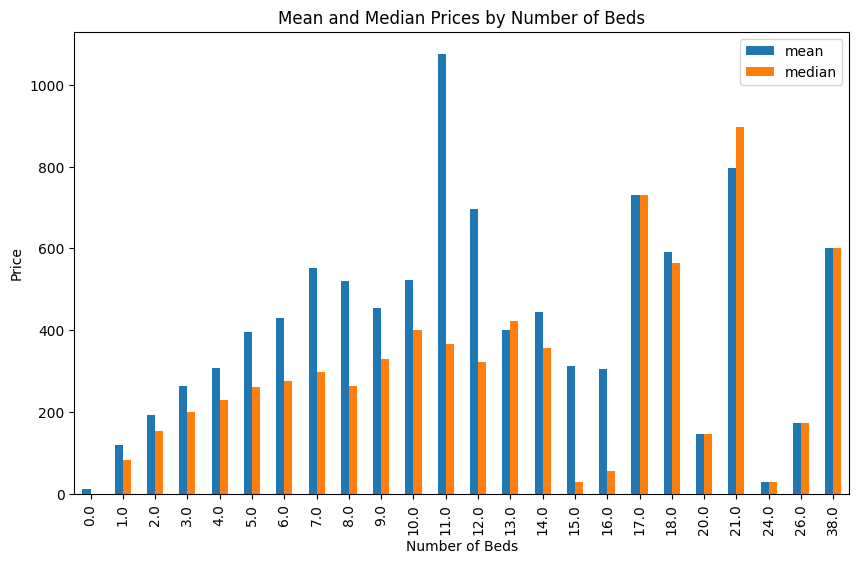

In [ ]:

# Calculate mean and median prices by number of beds
mean_median_prices = selected_features.groupby('beds')['price'].agg(['mean', 'median'])

# Plot mean and median prices
mean_median_prices.plot(kind='bar', figsize=(10, 6))
plt.title('Mean and Median Prices by Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('Price')
plt.show()

In [ ]:
# Group the data by the number of beds and calculate various statistics for price
bed_stats = selected_features.groupby('beds')['price'].agg(
    mean_price=('mean'),
    median_price=('median'),
    std_dev_price=('std'),
    min_price=('min'),
    max_price=('max'),
    listing_count=('count')
)

# Sort the statistics by the number of beds for easier interpretation
bed_stats_sorted = bed_stats.sort_index()

# Print the formatted statistics
print(bed_stats_sorted)

       mean_price  median_price  std_dev_price  min_price  max_price  listing_count
beds                                                                               
0.0     11.239393           0.0      59.988792        0.0     6000.0          35874
1.0    118.301135          82.0     508.056275        0.0    53588.0          28117
2.0    193.256724         154.0     206.669671        0.0     9652.0          14128
3.0    264.573715         200.0     286.254933        0.0     8000.0           6749
4.0    308.842887         230.0     339.239389        0.0     7271.0           3367
5.0    395.092564         260.5     817.150140        0.0    25000.0           1318
6.0    430.705970         276.5     532.992170        0.0     6000.0            670
7.0    552.748201         299.0    1069.960602       30.0    12000.0            278
8.0    519.657343         264.0    1095.004921       28.0    11500.0            143
9.0    454.258065         328.5     358.830749       30.0     1600.0        


- How does the average number of bathrooms relate to the listing price?

In [ ]:
# Group the data by the number of bathrooms and calculate various statistics for price
bathroom_stats = selected_features.groupby('bathrooms')['price'].agg(
    mean_price=('mean'),
    median_price=('median'),
    std_dev_price=('std'),
    min_price=('min'),
    max_price=('max'),
    listing_count=('count')
)

# Sort the statistics by the number of bathrooms for easier interpretation
bathroom_stats_sorted = bathroom_stats.sort_index()

# Print the formatted statistics
print(bathroom_stats_sorted)

            mean_price  median_price  std_dev_price  min_price  max_price  listing_count
bathrooms                                                                               
0.0           1.739336           0.0     115.735182        0.0    20000.0          33150
0.5          77.023202          60.0      85.419699       10.0     1066.0            431
1.0         142.666002         110.0     459.844023        0.0    53588.0          37096
1.5         131.031688          96.0     144.675854        0.0     5000.0           6785
2.0         250.358088         210.0     249.977028        0.0    12000.0           8766
2.5         308.655970         256.0     291.412021        0.0     8000.0           2119
3.0         385.982456         299.0     425.556344       11.0     5000.0           1368
3.5         553.334601         406.0     599.472351       21.0     7000.0            526
4.0         714.267281         425.0    1187.245428       34.0    10000.0            217
4.5         748.04800

- How does the average number of bedrroms relate to the listing price?

In [ ]:
# Group the data by the number of bedrooms and calculate various statistics for price
bedroom_stats = selected_features.groupby('bedrooms')['price'].agg(
    mean_price=('mean'),
    median_price=('median'),
    min_price=('min'),
    max_price=('max'),
    listing_count=('count')
)

# Sort the statistics by the number of bedrooms for easier interpretation
bedroom_stats_sorted = bedroom_stats.sort_index()

# Print the formatted statistics
print(bedroom_stats_sorted)

           mean_price  median_price  min_price  max_price  listing_count
bedrooms                                                                
0.0         21.562517           0.0        0.0    20000.0          15004
1.0         94.023168          70.0        0.0    53588.0          44544
2.0        148.597178         133.0        0.0     9652.0          20411
3.0        225.814142         185.0        0.0    25000.0           7043
4.0        285.391741         220.0        0.0     7771.0           2688
5.0        387.237074         264.0        0.0    12000.0            793
6.0        571.741071         336.0        0.0     6000.0            224
7.0        761.281690         352.0        0.0     5000.0             71
8.0       1065.096774         345.0        0.0    11500.0             31
9.0        104.444444           0.0        0.0      464.0              9
10.0       456.222222           0.0        0.0     2786.0              9
11.0       105.500000         105.5        0.0     

In [ ]:
# Sort the amenities by their total values in descending order
top_amenities = amenities_summary.sort_values(by='Total', ascending=False).head(10)

# Display the top 10 amenities
print(top_amenities)

In [ ]:
# Plot the top 10 amenities using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Total', y='Amenity', data=top_amenities, palette='viridis')

# Add labels and title
plt.xlabel('Number of Homes')
plt.ylabel('Amenity')
plt.title('Top 10 Most Common Amenities in Homes')

# Show the plot
plt.show()

In [ ]:
from wordcloud import WordCloud

# Assuming amenities_transposed is the DataFrame from the previous step
# Create a dictionary from the DataFrame for word cloud generation
amenities_dict = dict(zip(amenities_summary['Amenity'], amenities_summary['Total']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(amenities_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Airbnb Amenities', fontsize=16)
plt.show()


Review Scores Examination
   - How do review scores (accuracy and overall rating) vary by property type or room type?
   - Is there a relationship between review scores and the number of amenities offered?


Trend Analysis
   - Are there any observable trends in pricing or review scores over time within different neighborhoods or property types?
   - How do the review scores change with seasonal variations in pricing?


Outlier Detection
   - Are there any outliers in pricing or review scores based on the number of bedrooms, bathrooms, or amenities?
   - What factors contribute to high or low review scores in specific neighborhoods?

Spatial Distribution:

- How does the spatial distribution of listings with high review scores compare to those with lower scores?
- Are there specific areas where higher-priced properties tend to cluster?
- How does the average price of listings vary by neighborhood or neighborhood group?
- Are there significant differences in average review scores between different neighborhoods or neighborhood groups?

<Axes: >

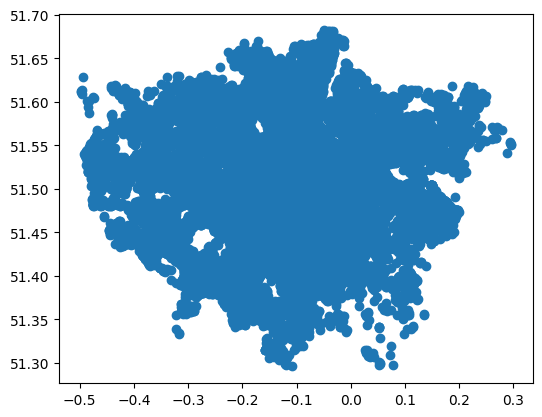

In [ ]:
# Convert to GeoDataFrame
gdf_airbnb = gpd.GeoDataFrame(
    airbnb_list,
    geometry=gpd.points_from_xy(airbnb_list['longitude'], airbnb_list['latitude']),
    crs="EPSG:4326"  # WGS84 coordinate system
)

# Display the data via a plot
gdf_airbnb.plot()

Housing Prices Data

**Property Type Insights:**
   - What is the distribution of property types (e.g., entire home, private room) across different neighborhoods?
   - How does the average price differ between various property types?

Shortlet Market Data

**Room Type Comparisons:**
   - How does the average rating of listings vary between different room types (e.g., shared room, private room)?
   - Is there a correlation between room type and the number of amenities offered?

## Spatial Analysis
Geocoding and plotting data on maps. Performing hotspot analysis, spatial autocorrelation, and kernel density estimation.


1. **Map the Spatial Distribution of Airbnb Listings:**
   - Geocode Airbnb listings to visualize their distribution across different regions in the UK.
   - Use Kernel Density Estimation (KDE) to identify areas of high Airbnb concentration.

In [ ]:
# plot the kernel density map
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Generate and add the KDE plot to the first axis
sns.kdeplot(
    data=robbery_gdf2,
    x="Longitude",
    y="Latitude",
    n_levels=75,
    shade=True,
    fill=True,
    levels=90,
    alpha=0.55,
    linewidths=1.5,
    cmap="YlOrRd",
    ax=axs[0]
)

# Generate and add the scatter plot to the second axis
sns.scatterplot(
    data=robbery_gdf2,
    x="Longitude",
    y="Latitude",
    alpha=0.5,
    color='blue',
    ax=axs[1]
)

# Set titles for the plots
axs[0].set_title("KDE Plot")
axs[1].set_title("location plot")



# Display the plots
plt.show()


2. **Identify Clusters and Spatial Patterns:**
   - Apply Hotspot Analysis (Getis-Ord Gi*) to detect statistically significant clusters of Airbnb activity.
   - Measure spatial autocorrelation (Moran's I) to determine the degree of spatial dependency among Airbnb listings.

In [ ]:
import libpysal as lib
from splot.esda import moran, plot_moran,moran_scatterplot
import esda


# Create a spatial weights matrix based on the data's spatial coordinates
w = lib.weights.distance.KNN.from_dataframe(airbnb_listing_df, k=10)

# Calculate Moran's I for the spatial coordinates
moran = esda.Moran(airbnb_listing_df['Latitude'],w)

# Print the Moran's I statistic and p-value
print(f"Moran's I: {moran.I:.2f}")
print(f"p-value: {moran.p_sim:.3f}")

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

ImportError: cannot import name 'moran' from 'splot.esda' (c:\Users\Admin\Desktop\airbnb-spatial-analysis\.venv\lib\site-packages\splot\esda.py)

3. **Analyze the Impact of Proximity to Amenities:**
   - Conduct Proximity Analysis to assess how the distance to key amenities (e.g., transport hubs, tourist attractions) affects Airbnb pricing and availability.

## Regression and Impact Analysis
Running spatial regression models to assess the impact of Airbnb listings on housing prices.


In [ ]:
OLA REgression anlysis

SyntaxError: invalid syntax (3468249879.py, line 1)

4. **Examine the Relationship Between Airbnb Listings and Housing Prices:**
   - Perform a Spatial Lag Model regression to account for spatial dependencies in housing prices influenced by nearby Airbnb activity.
   - Utilize Geographically Weighted Regression (GWR) to explore how the relationship between Airbnb listings and housing prices varies spatially across the UK.

In [ ]:
# Create a spatial weights matrix based on the data's spatial coordinates
w = lib.weights.distance.KNN.from_dataframe(robbery_gdf2, k=10)

# Calculate Moran's I for the spatial coordinates
moran = esda.moran(robbery_gdf2['Latitude'],w)

# Print the Moran's I statistic and p-value
print(f"Moran's I: {moran.I:.2f}")
print(f"p-value: {moran.p_sim:.3f}")

#build a moran I sccatter plot to show spatial lag of the dataset using
fig, ax = moran_scatterplot(moran, p=0.001)
ax.set_xlabel('Latitude')
ax.set_ylabel('Spatial Lag of Latitude')
plt.show()

Understand the relatiaotn hsip between the lsiting price and the average price of selling Building in all Postal Area

In [ ]:
#scatter v hist. plots visualisation with regression line 
sns.jointplot(data=warw_data, 
                x='tfarea', 
                y='price', 
                kind="reg", 
                scatter_kws=dict(alpha=0.8), 
                line_kws=dict(color='red'), 
                height=10) 

plt.xlabel('Total Floor Area') 
plt.ylabel('House Price') 

## Visualization
Creating choropleth maps and other visualizations to illustrate findings.


5. **Visualize Socioeconomic Factors and Airbnb Density:**
   - Create Choropleth Maps to visualize the distribution of variables such as median income, housing prices, and Airbnb density across different regions.

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1
toronto_nbhd.plot(linewidth=0.5, color='white', edgecolor='0.8', ax=axs[0])
robbery_gdf2.plot(ax=axs[0], markersize=3, color='red')

# Perform a spatial join between the point and polygon GeoDataFrames
aggregated = gpd.sjoin(robbery_gdf2, toronto_nbhd, how="left", op="within")

# Calculate the count of points within each polygon
count = aggregated.groupby("Neighbourhood_x").size()
count_df = pd.DataFrame(count)
robbery_count = count_df.rename(columns={0:'robbery count'}).reset_index()

# Join the count back to the polygon GeoDataFrame
toronto_nbhd = toronto_nbhd.merge(robbery_count, on='Neighbourhood_x')

toronto_nbhd.plot(column='robbery count', cmap='OrRd', linewidth=0.8, ax=axs[1], edgecolor='0.8', legend=True,
                  legend_kwds={'label': "Robbery Count", 'orientation': "vertical", 'pad': 0.01})
# axs[0].axis('off')
# axs[1].axis('off')
axs[0].set_title('Neighborhoods and Reported Robberies', fontdict={'fontsize': '15', 'fontweight': '6'})
axs[1].set_title('Robbery Count by Neighborhood', fontdict={'fontsize': '15', 'fontweight': '6'})

plt.show()

In [ ]:
sns.pairplot(toronto_nbhd)

In [ ]:
# Create a scatter plot with a regression line and confidence interval
sns.regplot(x='Population, 2016', y='robbery count', data=toronto_nbhd)

# Set the axis labels and title
plt.xlabel('Population, 2016')
plt.ylabel('Robbery Count')
plt.title('Population vs Robbery Counts')

# Display the plot
plt.show()

## Conducting impact analysis on the short-let market.

6. **Assess the Impact of Airbnb on Local Housing Markets:**
   - Conduct an Impact Analysis to examine how Airbnb density correlates with changes in housing prices and the availability of long-term rentals.
   - Use Buffer Analysis to study the effect of proximity to city centres and other key areas on Airbnb pricing and availability.


   7. **Evaluate Connectivity and Accessibility:**
   - Perform Network Analysis to assess the connectivity of Airbnb listings to transport networks and its influence on pricing and availability.

## Conclusions and Recommendations
Summarizing key findings and providing policy recommendations.


One findings from our rese thatarch is ameneiites , number a=of bedrooms and number of bathroom is not really the stronng reason that determines hosueshe prices in london evn htoughit is one of the stong vactor but with a correlation of 40 to 45% whcih indicate that the number of bathroom and bathdorom determines 40% onnhow houseign roice are listed

## Appendix
Including any additional analyses or data pre-processing steps.